In [1]:
from IPython.display import display, clear_output
from kaggle_environments import make

from caz.alpha_zero import AlphaZero, PytorchNeuralNetwork
from caz.solvers.mcts import MctsSolver
from caz.games import ConnectX, TicTacToe
from caz.views import policies

Loading environment lux_ai_s2 failed: No module named 'vec_noise'


# Visualising Model predictions for TicTacToe

In [15]:
tictactoe = TicTacToe()
tictactoe_state = tictactoe.initial_state([0, 1])
tictactoe_state

,a,b,c
3,⭕,✖️,
2,,,
1,,,


,a,b,c
3,⭕,✖️,
2,,,
1,,,


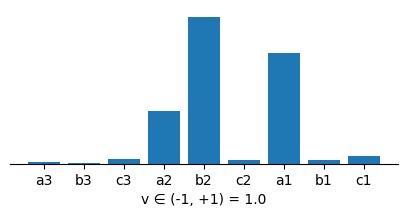

In [16]:
tictactoe_network = PytorchNeuralNetwork.create(tictactoe, "..")
alpha_zero_ttt = AlphaZero(tictactoe_network)

policy = alpha_zero_ttt.raw_policy(tictactoe_state)
tictactoe_state.show_policy(policy)

In [ ]:
policy = alpha_zero_ttt.policy(tictactoe_state, 2)
tictactoe_state.show_policy(policy)

# Visualising Model predictions for ConnectX

In [ ]:
connectx = ConnectX()
connectx_state = connectx.initial_state([1, 4, 3, 2, 5, 6, 7, 5, 4, 6, 5])
connectx_state

In [ ]:
connectx_network = PytorchNeuralNetwork.create(connectx, "..")
alpha_zero_connectx = AlphaZero(connectx_network)

policy = alpha_zero_connectx.raw_policy(connectx_state)
connectx_state.show_policy(policy)

In [ ]:
policy = alpha_zero_connectx.policy(connectx_state, num_mcts_sims=1600)
connectx_state.show_policy(policy)

# Alpha Zero vs Classical Monte Carlo Tree Search

In [ ]:
player_1000 = MctsSolver(1_000)
agent_1000 = connectx.create_agent(player_1000)

solver = alpha_zero_connectx.as_solver(100)
alpha_zero_agent = connectx.create_agent(solver)

env = make(connectx.name, debug=True)
states = env.run([agent_1000, alpha_zero_agent])
env.render(mode="ipython")

# Play against Alpha Zero

In [ ]:
game = ConnectX()
state = game.initial_state()
challenger_plays_as = 1  # play as Player: 1 or 2

network = PytorchNeuralNetwork.create(game, "..")
alpha_zero = AlphaZero(network)

network_old = PytorchNeuralNetwork.create(game, "..", 20)
alpha_zero_old = AlphaZero(network_old)


def get_move(i: int) -> int:
    if i % 2 == challenger_plays_as:
        return alpha_zero.select_move(state, 100)
    else:
        return state.get_input_move()
        # return alpha_zero_old.select_move(state, 60)


while state.status().is_in_progress:
    clear_output()
    display(state)
    move = get_move(state.num_moves)
    state.set_move(move)

clear_output()
display(state)
if state.status().value > 0:
    print("Challenger wins!" if state.played_by == challenger_plays_as else "AlphaZero wins!")
else:
    print("It's a draw!")